<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220824_Social_Media_Ads_Classification_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/06/15/social-media-ads-classification-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
for col in data.columns:
  print(data[col].sort_values().unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
[ 15000  16000  17000  18000  19000  20000  21000  22000  23000  25000
  26000  27000  28000  29000  30000  31000  32000  33000  34000  35000
  36000  37000  38000  39000  41000  42000  43000  44000  45000  46000
  47000  48000  49000  50000  51000  52000  53000  54000  55000  57000
  58000  59000  60000  61000  62000  63000  64000  65000  66000  68000
  69000  70000  71000  72000  73000  74000  75000  76000  77000  78000
  79000  80000  81000  82000  83000  84000  85000  86000  87000  88000
  89000  90000  91000  93000  95000  96000  97000  99000 100000 101000
 102000 104000 105000 106000 107000 108000 112000 113000 114000 115000
 116000 117000 118000 119000 120000 122000 123000 125000 126000 129000
 130000 131000 133000 134000 135000 137000 138000 139000 141000 142000
 143000 144000 146000 147000 148000 149000 150000]
[0 1]


In [9]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

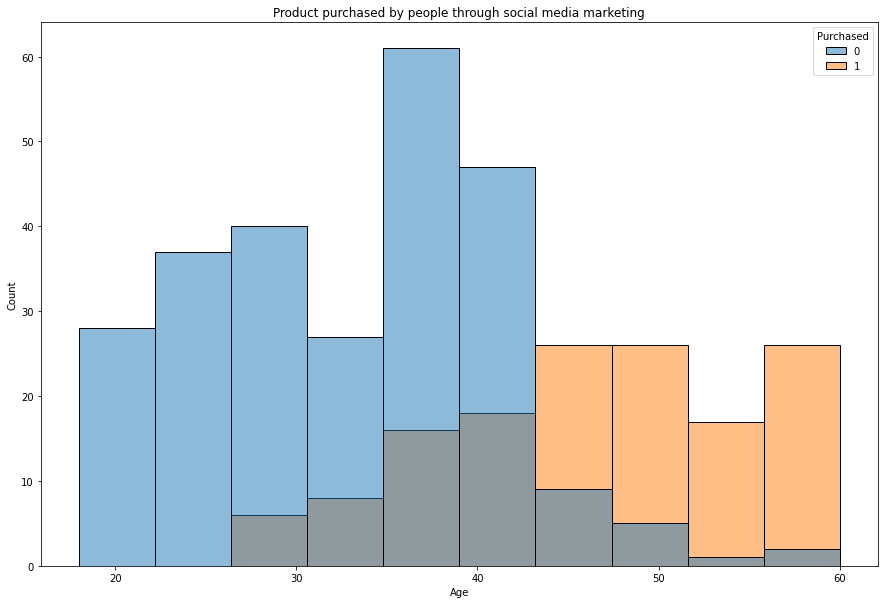

In [11]:
plt.figure(figsize=(15,10))
plt.title('Product purchased by people through social media marketing')
sns.histplot(x='Age', hue='Purchased', data=data)
plt.show()

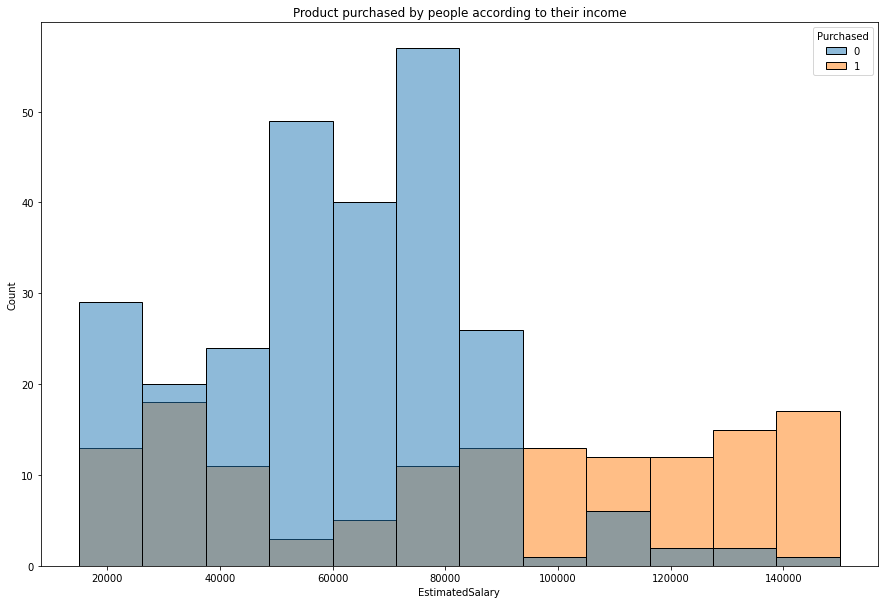

In [15]:
plt.figure(figsize=(15,10))
plt.title('Product purchased by people according to their income')
sns.histplot(x='EstimatedSalary', hue='Purchased', data=data)
plt.show()

In [16]:
x = np.array(data[['Age', 'EstimatedSalary']])
y = np.array(data['Purchased'])

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape 

((320, 2), (80, 2), (320,), (80,))

In [18]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [19]:
predictions = model.predict(xtest)

In [20]:
predictions

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [21]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.73      0.79      0.76        28

    accuracy                           0.82        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.83      0.82      0.83        80

